<a href="https://colab.research.google.com/github/ramess4/Team-39/blob/main/Machine_Learning_Preterm_FINAL_Team39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
FILE = "/content/drive/MyDrive/Hackathon/final_data.nat_recoded_mar13.csv"


Load in libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import imblearn
import numpy as np
import sklearn
import pickle
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from matplotlib import pyplot
from numpy import where

Read in cleaned version of the National Center for Health Statistics, CDC: Birth Data Files (US, 2018)
https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm

In [ ]:
df = pd.read_csv(FILE, index_col=0)
print (df.head())

       precare  previs  cig_0  cig_1  ...  sex  combgest  gestrec3  dbwt
mager                                 ...                               
39           2      60      0      0  ...    1        35         1  2126
39           2      60      0      0  ...    1        35         1  2211
24           2      60      0      0  ...    0        30         1  1361
24           2      60      0      0  ...    0        30         1  1247
24           2      60      0      0  ...    0        40         2  3657

[5 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
print(df.columns)

Index(['precare', 'previs', 'cig_0', 'cig_1', 'cig_2', 'cig_3', 'cig_rec',
       'm_ht_in', 'bmi', 'pwgt_r', 'wtgain', 'rf_pdiab', 'rf_gdiab',
       'rf_phype', 'rf_ghype', 'rf_ehype', 'rf_ppterm', 'rf_cesarn', 'ip_gon',
       'ip_syph', 'ip_chlam', 'ip_hepatb', 'ip_hepatc', 'sex', 'combgest',
       'gestrec3', 'dbwt'],
      dtype='object')


In [ ]:
# drop delivery birth weight from dataframe
# drop sex from the model - In India it is illegal to provide details on the baby's sex 
# drop number of cigarettes smoked in each trimester since our app is tailored toward risk stratification at intake
# drop previs because trying to asses risk at earliest point 
# drop precare because users are being introduced to app through midwife - selection bias
# drop combgest - redundant variable
df = df.drop(columns=['dbwt', 'sex', 'previs', 'precare', 'cig_1', 'cig_2', 'cig_3', 'combgest'])

In [ ]:
df

,cig_0,cig_rec,m_ht_in,bmi,pwgt_r,wtgain,rf_pdiab,rf_gdiab,rf_phype,rf_ghype,rf_ehype,rf_ppterm,rf_cesarn,ip_gon,ip_syph,ip_chlam,ip_hepatb,ip_hepatc,gestrec3
mager,,,,,,,,,,,,,,,,,,,
39,0,0,66,21.8,135,40,0,1,0,0,0,0,0,0,0,0,0,0,1
39,0,0,66,21.8,135,40,0,1,0,0,0,0,0,0,0,0,0,0,1
24,0,0,61,22.3,118,36,0,0,0,0,0,0,0,0,0,0,0,0,1
24,0,0,61,22.3,118,36,0,0,0,0,0,0,0,0,0,0,0,0,1
24,0,0,63,25.7,145,19,0,1,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,62,35.7,195,0,0,0,0,0,0,0,1,0,0,0,0,0,2
25,0,0,62,29.3,160,0,0,0,0,0,0,0,0,0,0,0,0,0,2
27,10,1,67,30.4,194,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Variables in data frame:
 - cig_0 = number of cigarettes smoked before pregnancy
 - cig_rec = cigarettes smoked (Y/N)
 - m_ht_in = mother's height in inches
 - bmi  = body mass index
 - pwgt_r = pre-pregnancy weight
 - wtgain = weight gain
 - rf_pdiab = pre-pregancy diabetes (Y/N)
 - rf_gdiab = gestational diabetes (Y/N)
 - rf_phype = pre-pregnancy hypertension (Y/N)
 - rf_ghype = gestational hypertension (Y/N)
 - rf_ehype = hypertension eclampsia
 - rf_ppterm = previous preterm birth
 - rf_cesarn = number of previous cesareans
 - ip_gon = gonorrhea (Y/N)
 - ip_syph = syphillis (Y/N)
 - ip_chlam = Chlamydia (Y/N)
 - ip_hepatb = Hep B (Y/N)
 - ip_hepatc = Hep C (Y/N)
 - gestrec3 = 1) Under 37 weeks, 2) > 37 weeks 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


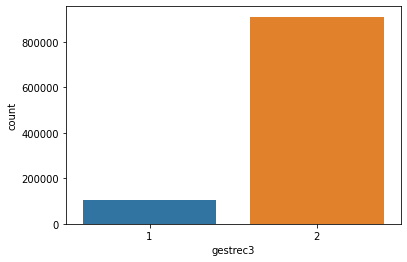

In [ ]:
# Count number of preterm (<37 weeks) and term (>37 weeks) births
sns.countplot(x='gestrec3', data=df)

In [ ]:
#Print number of individuals in each group
print("Observations in Class 1: ",sum(df['gestrec3']==1))
print("Observations in Class 2: ",sum(df['gestrec3']==2))

Observations in Class 1:  106132
Observations in Class 2:  911142


Define label (gestrec3) and features for model 

In [ ]:
X = df.drop('gestrec3' , axis = 1)
y = df['gestrec3']

In [ ]:
#Count observations
counter = Counter(y)
print (counter)

Counter({2: 911142, 1: 106132})


Since data is unbalanced - Use an undersampling method to balance out the two groups

In [ ]:
# define dataset
X, y = make_classification(n_samples=1017274,
	 weights=[0.89567019309], flip_y=0)
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X, y = undersample.fit_resample(X, y)
# summarize class distribution
counter = Counter(y)
print(Counter(y))

Counter({0: 911143, 1: 106131})
Counter({0: 106131, 1: 106131})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Visualize balanced data

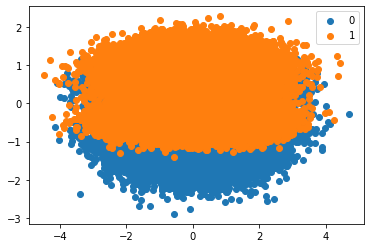

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Define test and training data. Use 90% of the data to train the model, and 10% to test the model

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [ ]:
#print shape 
print('Shape of X_train: ' , x_train.shape)
print('\nShape of Y_train: ' , y_train.shape)
print('\nShape of X_test: ' , x_test.shape)
print('\nShape of Y_test: ' , y_test.shape)

Shape of X_train:  (191035, 20)

Shape of Y_train:  (191035,)

Shape of X_test:  (21227, 20)

Shape of Y_test:  (21227,)


There are 191035 training and 21227 test samples after cleaning the data and undersampling. There are 20 different features in the data

Model #1: Logistic Regression


In [ ]:
def Logistic_Regression(X , y):
    
    model = LogisticRegression(max_iter = 100000)
    model = model.fit(X , y.ravel())
    return model

log_model = Logistic_Regression(x_train , y_train)

def Results(model , X , y):    
    
    acc = model.score(X , y)
    err =  1 - model.score(X , y)
    pred = model.predict(X)
    return acc , err , pred

log_acc_tr , log_err_tr , log_pred_tr = Results(log_model , x_train , y_train)
log_acc_te , log_err_te , log_pred_te = Results(log_model , x_test , y_test)

print("Accuracy on training data : " , log_acc_tr)
print("\nClassification error on training data : " , log_err_tr)
print("\nAccuracy on testing data : " , log_acc_te)
print("\nClassification error on testing data : " , log_err_te)

Accuracy on training data :  0.9574004763525008

Classification error on training data :  0.04259952364749919

Accuracy on testing data :  0.9576953879493099

Classification error on testing data :  0.04230461205069014


Save logistic regression model

In [ ]:
filename = 'Model1_LogisticRegression.sav'
pickle.dump(log_model, open(filename, 'wb'))

Open saved logistic regression model

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9576953879493099


Model #2 XGBoost


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [ ]:
def xgboost_model(x_train , y_train , x_test , y_test):
    model = XGBClassifier()
    model.fit(x_train , y_train)
    
    y_pred_test = model.predict(x_test)
    predictions_test = [round(value) for value in y_pred_test]
    
    y_pred_train = model.predict(x_train)
    predictions_train = [round(value) for value in y_pred_train]
    
    accuracy_test = accuracy_score(y_test , predictions_test)
    accuracy_train = accuracy_score(y_train , predictions_train)
    
    return accuracy_train , accuracy_test


In [ ]:
xg_acc_train , xg_acc_test = xgboost_model(x_train , y_train , x_test , y_test)

In [ ]:
print("Classification Accuracy on training data is : " , xg_acc_train,
"=>" , xg_acc_train*100 , "%")

print("\nClassification Accuracy on testing data is : " , xg_acc_test ,
"=>" , xg_acc_test*100 , "%")

Classification Accuracy on training data is :  0.9683670531577984 => 96.83670531577984 %

Classification Accuracy on testing data is :  0.9657511659678711 => 96.57511659678711 %
